<a href="https://colab.research.google.com/github/DanieelRC/RNyAP/blob/main/RodriguezCarreonDaniel_DescensoPorGradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rodriguez Carreón Daniel  03 de Octubre de 2025

In [72]:
# importamos los paquete necesarios
import numpy as np
import nni

# cargamos datos de ejemplo
from data_prep import features, targets, features_test, targets_test

n_records, n_features = features.shape
last_loss = None

# En este ejercicio por propósitos de analizar las salidas utilizaremos la misma semilla para los números aleatorios.
np.random.seed(42)

In [73]:
# Initialize weights.
weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
bias = np.zeros(1)

# Definimos la neurona
from nni.models import Neurona
from nni.functions import sigmoid

nodo = Neurona(weights, bias, nni.functions.sigmoid)

In [74]:
# número de épocas
epochs = 1000

# tasa de aprendizaje
learnrate = 0.0001

In [75]:
#TODO (1 punto): Completa el código faltante

# Variable para registrar el rendimiento
History_loss = []

# Algoritmo descenso por gradiente
for e in range(epochs):
    incremento_w = np.zeros(weights.shape)
    # Para todos los renglones de ejemplo, asignar a x la entrada, y a y la salida deseada
    for x, y in zip(features.values, targets):
        # TODO: calcula la predicción de la red
        h = np.dot(x, weights) + bias
        output = sigmoid(h)

        # TODO: calcula el término de error
        error_term = (y - output) * (output*(1-output))

        # TODO: calcula el incremento
        incremento_w += learnrate*error_term * x
        bias += learnrate * error_term

    # TODO: Actualiza los pesos
    weights += incremento_w
    nodo.weights = weights


    # Ahora calculemos el error en el conjunto de datos de entrenamiento para registro y visualización
    out = nodo.forward(features.values)
    loss = np.mean((out - targets) ** 2)
    History_loss.append(loss)
    if e % (epochs / 10) == 0:
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss

Train loss:  0.2638721700108315
Train loss:  0.2389516661879578
Train loss:  0.2240360470499657
Train loss:  0.2152403456612215
Train loss:  0.2099770896712757
Train loss:  0.20673356567725445
Train loss:  0.2046594850537748
Train loss:  0.20327799331272625
Train loss:  0.20231795932954322
Train loss:  0.2016220068208228


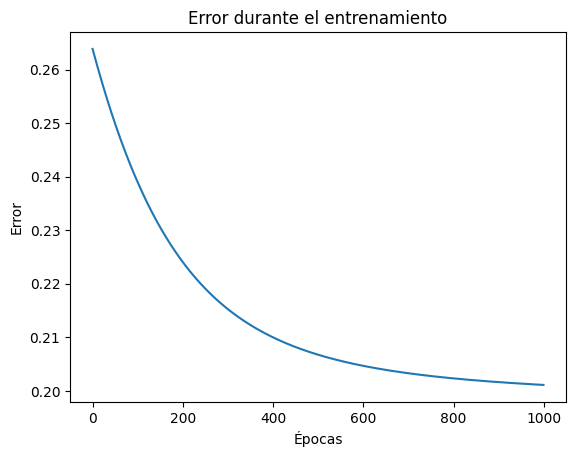

In [76]:
# Grafica el error conforme avanzaron las épocas del entrenamiento.

import matplotlib.pyplot as plt

plt.plot(History_loss)
plt.title("Error durante el entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Error")
plt.show()

In [77]:
# Cálculo de la exactitud

test_out = nodo.forward(features_test)
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.775
